# Investigating a Dataset: Movies

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

What are the properties of high revenue films? Using data from The Movie Database (TMDb), I investigated the relationship between popularity, runtime, and vote average (rating) and the adjusted revenue of the films. To account for inflation, the adjusted revenue column reflects a film's revenue in 2010 dollars.

> * Has film revenue changed over time?
> * Are high revenue films more popular than low revenue films?
> * Is there a positive relationship between runtime and revenue? Is it worth it to produce a long film?
> * Are high revenue films highly rated?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_movies = pd.read_csv(r"C:\Users\bsear\Desktop\Class Assignments\movies.csv")
df_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


___

<a id='wrangling'></a>
## Data Wrangling

> A quick review of the dataset tells me what data types I have, if there are null values, and what kind of clean-up, if any, is needed before evaluation.

> At first glance, it appears that all of the variables I want to investigate are populated with data. Before I take a closer look at those columns, I removed the columns "ID", "IMDB ID", "Homepage", "Tagline", and "Overview". Since I am not using those variables in my evaluation, I took those out in order to keep the dataframe tidy and easy to read.

> I kept other columns, such as titles, directors, cast, genres, production companies, and release dates in case those variables provide additional insights later on.

> After closer inspection, I had to clean the runtime and adjusted revenue columns.

In [3]:
#what does my dataset look like?
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#Removing extraneous data columns here
df_movies.drop(['id', 'imdb_id', 'homepage','tagline','overview'], axis=1, inplace=True)
df_movies.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [5]:
#checking to see if there are duplicates and removing them
df_movies.drop_duplicates(inplace=True)
sum(df_movies.duplicated())

0

In [6]:
#check for null values, particularly in my chosen variables
list(df_movies.isnull().sum().items())

[('popularity', 0),
 ('budget', 0),
 ('revenue', 0),
 ('original_title', 0),
 ('cast', 76),
 ('director', 44),
 ('keywords', 1493),
 ('runtime', 0),
 ('genres', 23),
 ('production_companies', 1030),
 ('release_date', 0),
 ('vote_count', 0),
 ('vote_average', 0),
 ('release_year', 0),
 ('budget_adj', 0),
 ('revenue_adj', 0)]

In [7]:
#before starting my analysis, I want to investigate the lack of null-values just a little more.
#this serves as a double check.
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#even though the previous null data check came back as 0 for my chosen variables, the describe function shows
#that my minimum value for revenue_adj is 0 - which seems odd. Here I take a closer look
null_data=df_movies[df_movies.isnull().any(axis=1)]
null_data.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
130,1.284541,0,4719695,True Story,Jonah Hill|James Franco|Felicity Jones|Maria D...,Rupert Goold,NaN,100,Crime|Drama|Mystery,Plan B Entertainment|Regency Enterprises|New R...,4/17/2015,354,6.0,2015,0.0,4342117.489


In [9]:
#why does the runtime column have 0 as a minimum runtime?
df_movies[df_movies['runtime']==df_movies['runtime'].min()].head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/2015,11,5.4,2015,0.0,0.0


In [10]:
#The other variables in the table indicate that those films with "0" runtime must actually be null values
#Here I replaced the '0' values with null
df_movies['runtime'].replace(0, np.nan, inplace=True)
df_movies['runtime'].describe()

count    10834.000000
mean       102.363855
std         30.948225
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [11]:
#this is a variable I plan to use in my analysis, so I am replacing those null values with the mean runtime
#this allows me to compare the same number of movies across my variables
runtime_mean=df_movies['runtime'].mean()
df_movies['runtime'].fillna(runtime_mean, inplace = True)
df_movies['runtime'].describe()

count    10865.000000
mean       102.363855
std         30.904039
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [12]:
#why does the adjusted revenue column have 0 as a minimum value?
#Just like with runtime, the adjusted revenue column also has '0' values where null is more appropriate
df_movies[df_movies['revenue_adj']==df_movies['revenue_adj'].min()].head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,2.93234,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,gambling|bodyguard|remake,92.0,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/2015,481,5.3,2015,27599987.86,0.0


In [13]:
#The other variables in the table indicate that those films with "0" adjusted revenue must actually be null values
#Here I am replacing the '0' values with null
df_movies['revenue_adj'].replace(0, np.nan, inplace=True)
df_movies['revenue_adj'].describe()

count    4.849000e+03
mean     1.151009e+08
std      1.988557e+08
min      2.370705e+00
25%      1.046585e+07
50%      4.395666e+07
75%      1.316482e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [14]:
#Now I am determining the mean adjusted revenue and replacing the null values with the mean
revenue_adj_mean=df_movies['revenue_adj'].mean()
df_movies['revenue_adj'].fillna(revenue_adj_mean, inplace = True)
df_movies['revenue_adj'].describe()

count    1.086500e+04
mean     1.151009e+08
std      1.328386e+08
min      2.370705e+00
25%      5.878518e+07
50%      1.151009e+08
75%      1.151009e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [15]:
#now I have the same number of non-null values for the characteristics I want to test.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   keywords              9372 non-null   object 
 7   runtime               10865 non-null  float64
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  float64
 15  revenue_adj        

___

<a id='eda'></a>
## Exploratory Data Analysis

> After an initial cleanup of my data, I can now begin my data analysis to answer my research questions:

<ul>
<li><a href="#q1">1. Has film revenue changed over time?</a></li>
<li><a href="#q2">2. Are high revenue films more popular than low revenue films?</a></li>
<li><a href="#q3">3. Is there a positive relationship between runtime and revenue?</a></li>
<li><a href="#q4">4. Are high revenue films highly rated?</a></li>
</ul>


___

<a id='q1'></a>
__1. Has film revenue changed over time?__

> Are movies making more money now than in the past?

Text(0, 0.5, 'Adjusted Revenue in 2010 Dollars')

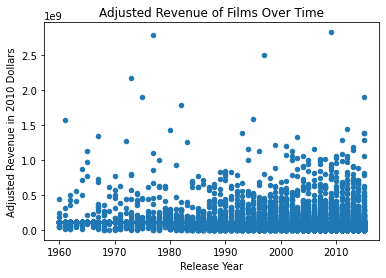

In [139]:
#initial scatter plot
#I referenced the matplotlib.org page to learn the syntax for .set_xlabel 
film_plot = df_movies.plot(x='release_year', y='revenue_adj', 
                           title='Adjusted Revenue of Films Over Time', kind='scatter');
film_plot.set_xlabel('Release Year')
film_plot.set_ylabel('Adjusted Revenue in 2010 Dollars')

> This chart visually represents every film in the dataset and its adjusted revenue. At first glance, this chart shows a higher number of films produced in later decades, as well as a number of outliers in each year. It is not, however, very clear to me if there is an obvious trend in this chart. I will need to create a better visual. I have over 10,000 records, so I will need to organize the films into broader categories, such as decades.

In [17]:
#Here I will cut the values into decades based on release year
bin_edges=[1960, 1970, 1980, 1990, 2000, 2010, 2020]
bin_names=['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df_movies['release_decade']=pd.cut(df_movies['release_year'], bin_edges, labels=bin_names)
df_movies.head(1) #testing what it looks like

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_decade
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2010s


Text(0, 0.5, ' ')

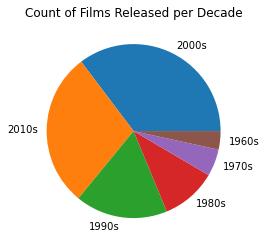

In [140]:
#pie chart visual
film_pie = df_movies['release_decade'].value_counts().plot(kind='pie', 
                                                           title='Count of Films Released per Decade');
film_pie.set_ylabel(" ")

> In this pie chart, I wanted to see if there were more film releases in certain decades to confirm my initial impression from the scatter plot. It shows an increase in the number of films released each decade.

In [19]:
#to prepare for my descriptive bar chart, I start by calucalting
#the mean revenue for the decades
decade_revenue_means = df_movies.groupby('release_decade')['revenue_adj'].mean()
decade_revenue_means

release_decade
1960s    1.486290e+08
1970s    1.520075e+08
1980s    1.066893e+08
1990s    1.173703e+08
2000s    1.118565e+08
2010s    1.102115e+08
Name: revenue_adj, dtype: float64

Text(0, 0.5, 'Mean Adjusted Revenue in 2010 Dollars')

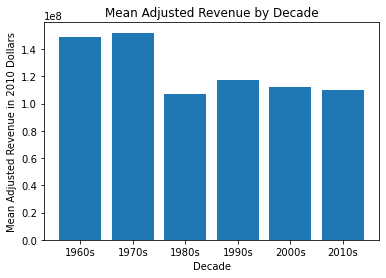

In [20]:
#then organize my data into the chart
locations = [1,2,3,4, 5, 6]
heights = decade_revenue_means
labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean Adjusted Revenue by Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Adjusted Revenue in 2010 Dollars')

> __Thought:__ It appears that, while there are more movies made in later decades, the mean adjusted revenue is higher for earlier films. I decided to create this kind of visualization to compare the adjusted revenue means. The pie chart was interesting, but it really focused on the _count_ of movies. The scatter plot showed every film and it's adjusted revenue, but looking at individual films in this way is too detailed. This bar chart is a great visual to show, regardless of number of films produced each decade, which decade had the highest mean adjusted revenue. In short, it's a single visual that answers my question.

* This is a visualization I really like and plan to use again, so I will make a function here to reduce the repetition of the lengthy code.

In [40]:
#defining my function
def bar_plot(locations, heights, labels, xlabel, ylabel, title):
    plt.bar(locations, heights, tick_label=labels)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [131]:
#creating a list of labels
decades = list(df_movies['release_decade'].unique().dropna())
decades.sort(reverse=False)
decades

['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

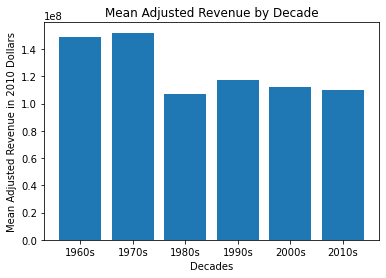

In [132]:
#running my new function
bar_plot([1,2,3,4,5,6], decade_revenue_means, decades,'Decades', 
         'Mean Adjusted Revenue in 2010 Dollars', 'Mean Adjusted Revenue by Decade')

___

<a id='q2'></a>
__2. Are high revenue (adj) films more popular than low revenue films?__

> How popular are the high revenue films? Are they more or less popular than low revenue films?

In [63]:
#Information about the 'popularity' variable
df_movies['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

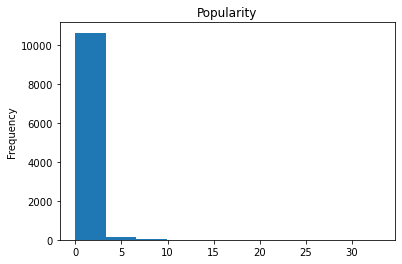

In [143]:
df_movies['popularity'].plot(kind='hist', title= "Popularity");

In [64]:
#a closer look at the minimum value to better understand the variable
df_movies[df_movies['popularity']==df_movies['popularity'].min()]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_decade,popularity_level
6181,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,561.0,Drama|History|Western,NaN,11/3/1985,17,6.0,1985,0.0,1.151009e+08,1980s,NaN


In [65]:
#Getting more information about what the 'popularity' variable means
df_movies.groupby('revenue_adj')['popularity'].mean()

revenue_adj
2.370705e+00     0.462609
2.861934e+00     0.552091
3.038360e+00     0.352054
5.926763e+00     0.208637
6.951084e+00     0.578849
                  ...    
1.907006e+09     2.563191
2.167325e+09     2.010733
2.506406e+09     4.355219
2.789712e+09    12.037933
2.827124e+09     9.432768
Name: popularity, Length: 4840, dtype: float64

> In this case, I'm not sure that the variable 'popularity' is really understandable in its current format. I think I need to adjust the values into more meaningful phrases.

In [66]:
#changing the values into string labels
bin_edges=[0.000065, 0.207575, 0.383831, 32.985763]
bin_names=['Low', 'Moderate', 'High']
df_movies['popularity_level']=pd.cut(df_movies['popularity'], bin_edges, labels=bin_names)
df_movies.head(1) #testing what it looks like

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_decade,popularity_level
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2010s,High


> I think my new column 'popularity level' better conveys the meaning from the 'popularity' column.

In [67]:
#build a visual to compare popularity and mean adjusted revenue
popularity_revenue_means = df_movies.groupby('popularity_level')['revenue_adj'].mean()
popularity_revenue_means

popularity_level
Low         1.013358e+08
Moderate    9.190113e+07
High        1.335833e+08
Name: revenue_adj, dtype: float64

In [126]:
#creating a list of labels
popularity_level = ['Low', 'Moderate', 'High']
popularity_level

['Low', 'Moderate', 'High']

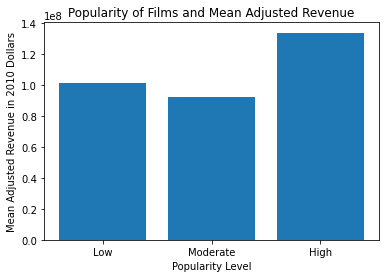

In [127]:
#running my new function
bar_plot([1,2,3], popularity_revenue_means, popularity_level,'Popularity Level', 'Mean Adjusted Revenue in 2010 Dollars', 
         'Popularity of Films and Mean Adjusted Revenue')

> __Thought:__ Just like in my first question, I wanted to create a bar graph to answer my question. It's an easy way to see the difference in popularity levels and film revenue, regardess of the number of films produced. It's not particularly surprising that highly popular films also bring in the most revenues. It's interesting, however, that low popularity films make more revenue than moderatly popular films. 

____

__3. Is there a positive relationship between runtime and revenue (adj)?__

> Do long movies make more money?

In [70]:
#Descriptive stats on the 'runtime' variable
df_movies['runtime'].describe()

count    10865.000000
mean       102.363855
std         30.904039
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

> Just like 'popularity', I think looking at the length of a film in terms of minutes might not be meaningful
#to people reading the information. For example, it's easier to understand what 1 hour 40 minutes means
#in terms of movie length compared to 100 minutes.

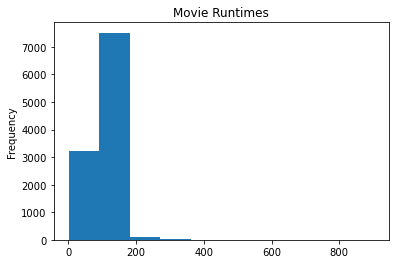

In [144]:
#quick review of my variable
df_movies['runtime'].plot(kind='hist', title="Movie Runtimes");

In [71]:
#Here I create a new measure for the movie runtimes
bin_edges=[0,90,99,111,900]
bin_names=['short', 'medium', 'moderately long', 'long']
df_movies['movie_length']=pd.cut(df_movies['runtime'], bin_edges, labels=bin_names)
df_movies.head(1) #testing what it looks like

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_decade,popularity_level,movie_length
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2010s,High,long


In [72]:
#How many of each movie length type
df_movies['movie_length'].value_counts()

short              2931
long               2710
medium             2651
moderately long    2573
Name: movie_length, dtype: int64

> The number of films fall fairly evenly into each category of length

In [73]:
#As percentages to confirm my impression
(df_movies['movie_length'].value_counts()/df_movies['movie_length'].value_counts().sum())*100

short              26.976530
long               24.942476
medium             24.399448
moderately long    23.681546
Name: movie_length, dtype: float64

> Is there a relationship between movie length and revenue?

In [75]:
#Calculating means for each length type
runtime_revenue_means = df_movies.groupby('movie_length')['revenue_adj'].mean()
runtime_revenue_means

movie_length
short              1.035472e+08
medium             9.980478e+07
moderately long    1.009606e+08
long               1.559853e+08
Name: revenue_adj, dtype: float64

In [108]:
#creating a list of labels
movie_lengths = list(df_movies['movie_length'].unique().dropna())
movie_lengths.sort(reverse=True)
movie_lengths

['short', 'moderately long', 'medium', 'long']

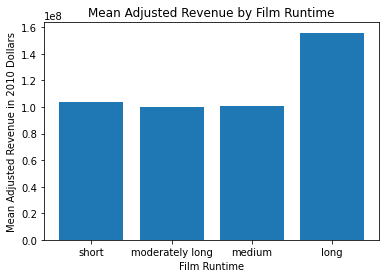

In [109]:
#running my function
bar_plot([1,2,3,4], runtime_revenue_means, movie_lengths,'Film Runtime', 
         'Mean Adjusted Revenue in 2010 Dollars', 'Mean Adjusted Revenue by Film Runtime')

> __Thought:__ Again, using this kind of visualization is a great way to see where difference exists. A pie chart might also be an interesting visual for this output, as well; particularly since there is one value much greater than the rest. I a little suprrised by the result. There is clearly a jump in revenue for "long" films. "Long" films are at least 1 hour and 51 minutes long.

__4. Are high revenue (adj) films highly rated?__

> Just because a movie makes a lot of money - does it mean that it's also highly rated?

In [111]:
#Descriptive stats for the variable
df_movies['vote_average'].describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

> After looking at the descriptive stats for 'vote average', these values are a little more unclear at first glance. Some descriptive language might make the values have more meaning to readers.

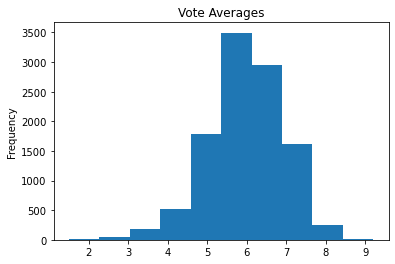

In [145]:
#more context for my analysis
df_movies['vote_average'].plot(kind='hist', title="Vote Averages");

In [112]:
#again, creating descriptive values by defining bin edges and cutting the data into my new measures.
bin_edges=[1.5, 5.4,6.0,6.6,9.2]
bin_names=['low', 'medium', 'moderately high', 'high']
df_movies['voting_score']=pd.cut(df_movies['vote_average'], bin_edges, labels=bin_names)
df_movies.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_decade,popularity_level,movie_length,voting_score
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2010s,High,long,moderately high


In [113]:
#creating means
vote_values_means = df_movies.groupby('voting_score')['popularity'].mean()
vote_values_means

voting_score
low                0.420572
medium             0.555395
moderately high    0.705920
high               0.930673
Name: popularity, dtype: float64

In [120]:
#creating a list of labels
scores = ['low', 'medium', 'moderately high', 'high']
scores

['low', 'medium', 'moderately high', 'high']

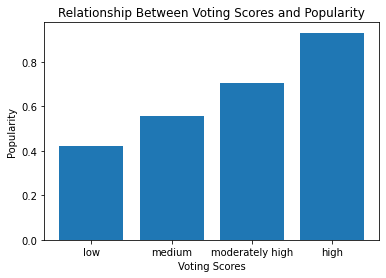

In [121]:
#running my function
bar_plot([1,2,3,4], vote_values_means, scores,'Voting Scores', 
         'Popularity', 'Relationship Between Voting Scores and Popularity')

> __Thought:__ A detailed bar chart shows the relationship between voting scores (ratings) and popularity. It's a clear trend indicating that popular films are highly rated by audiences. Does the same trend hold with another kind of visual?

Text(0, 0.5, 'Popularity')

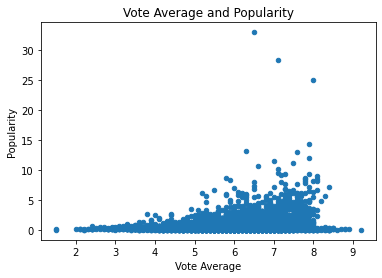

In [146]:
#Scatter
popularity_plot = df_movies.plot(x='vote_average', y='popularity',
                                 title="Vote Average and Popularity", kind='scatter');
popularity_plot.set_xlabel('Vote Average')
popularity_plot.set_ylabel('Popularity')

> The trend holds within a scatter plot; while this kind of chart shows the outliers, the data clearly shows a positive relationship between vote average and popularity.

___

<a id='conclusions'></a>
## Conclusions

__1. Has film revenue changed over time?__

Yes, absolutely. I found it particularly interesting that the _number_ of films being made has increased, but the revenue is down. Movies released in the 1960s and 1970s were fewer in number but earned more at the boxoffice. Why?

* Fewer TVs? Less at-home entertainment could explain why revenue was higher in teh 1960s and 1970s.
* The rise of the VHS in the 1980s and the prevalence of at-home movie consumption in the 1990s and 2000s could explain the drop in revenue despite the increased number of film releases.

> Limitation: I am making an educated guess as to why films brought in higher revenue in the 1960s and 1970s. An additonal dataset with information about at-home entertainment systems would be an interesting evaluation. Is there a correlation? 

> Limitation: Were people going to the movies more often back in teh 1960s and 1970s? This dataset may record "popularity" but it doesn't necessarily indicate how may people attended these movies.

__2. Are high revenue films more popular than low revenue films?__

As expected, yes, high revenue films are popular films. It is an easy assumption to make that, if people like a film, they will invest in it more, either by seeing it in the theatre multiple times and/or purchasing the film.

> Limitation: high revenue films are popular, but are popular films high earners? It would be a good idea to confirm this. Are both variables predictors of the other?

> Limitation: the variable "popularity" is a somewhat vague variable and I could not find much information online about how TMDb defines popularity. Is it the number of people who see the film? The number of times it plays? How many copies of the film people buy? How long the film is in theatres? Or is it another measure? While the relationship between popularity and revenue doesn't change, the meaning of the results could change if the variable is more clearly defined.

__3. Is there a positive relationship between runtime and revenue?__

There is a positive relationship between runtime and revenue. You can clearly see in the bar graph how much higher revenue is for the "long" film runtime.

* I was surprised by this result at first, as I wasn't sure there would be a well-defined relationship at all.
* I also expected that if there was a relationship, I didn't think long films would necessarily be popular.

> Limitations: Time is relative and subjective. Using runtime as a variable may be useful in determining the minimum and maximum film runtime to get the most return on investment, but people's definitions of a "long" or "short" film may vary. 

> Liminations: After looking at the data more closely, 111 minutes (1 hour 51 minutes) isn't really that long (to me). As I mentioned above, movie time length can be subjective and others may think a 2 hour film is long. If I did this analysis again, I might categorize the lengths differently or change the minute runtime into hour runtimes.

__4. Are high revenue films highly rated?__

Yes, high revenue films also receive high ratings. I was a little surprised at these findings; just because a movie brings in a lot of money doesn't automatically make it a "good" film. Then again, this is a subjective measure. 

>Limitations: Just like with the "popularity" variable, TMDb doesn't define "average rating" in this dataset. I made the assumption that it was a film rating.

## Final Thoughts

This dataset was very interesting to work with and there are many ways to measure the characteristics of a high revenue film than the ones I used. If I were to do this project over, I would re-consider some of the variables I chose to evaluate my questions. The dataset could be improved with more information about some of the variables, such as popularity and average ratings. While the lack of a definition doesn't affect the calculations, it can affect the story I tell with the data. 